# Master Data Science and Business Analytics - Exam: Machine Learning

### Directions

Fill the empty code cells in order to implement the described tasks and reproduce the given output.

A slight difference of your output in values and number of rows does not affect a positive evaluation

The program must be _reproducible_: repeated executions must give the same results  

### Workflow
1. load the data in memory
1. drop the useless data
1. separe the predicting attributes X from the class attribute y
1. split X and y into training and test
1. train a classifier of your choice and find the best parameter setting using __cross validation__, optimize for best __accuracy__
1. show a classification report for the training set
1. test the optimized classifier with the _test set_ and show a classification report

In [161]:
# insert your imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [150]:
# insert here your initial variable settings and load the data
target = 'Class'
random_state = 42
train_size = 0.75

df = pd.read_csv('./exam_data.csv', sep=',', header=0)
df.head()

,C00,C01,C02,C03,C04,Class
0,NaN,0.466367,-0.176765,1.546514,0.149219,c
1,NaN,-0.136792,1.551591,NaN,1.357674,a
2,2.712560,-0.495846,NaN,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


Have a quick look to the data.
- use the .shape attribute to see the size
- use the `.head()` function to see column names and some data
- use the `.hist()` method for an histogram of the numeric columns
- show an histogram of the target column
- use seaborn pairplot to show the numeric data, use the target values as color

In [151]:
print(f"Shape of the input data {df.shape}")

Shape of the input data (1000, 6)


In [152]:
df.head()

,C00,C01,C02,C03,C04,Class
0,NaN,0.466367,-0.176765,1.546514,0.149219,c
1,NaN,-0.136792,1.551591,NaN,1.357674,a
2,2.712560,-0.495846,NaN,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


array([[<Axes: title={'center': 'C00'}>, <Axes: title={'center': 'C01'}>],
       [<Axes: title={'center': 'C02'}>, <Axes: title={'center': 'C03'}>],
       [<Axes: title={'center': 'C04'}>, <Axes: >]], dtype=object)

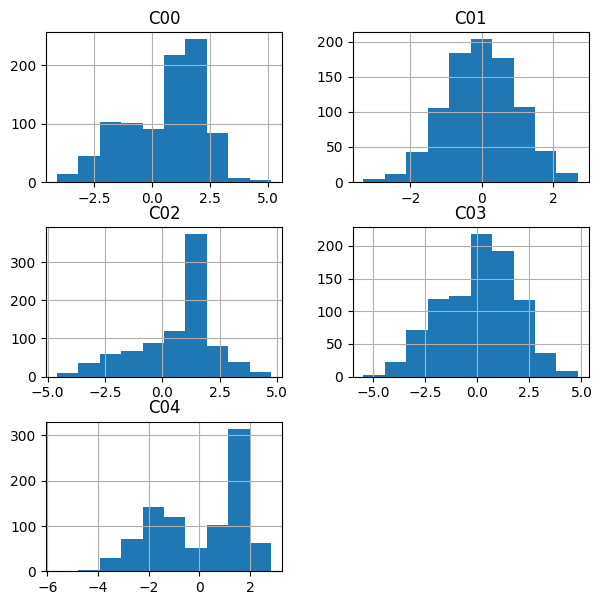

In [153]:
df.hist(figsize=(7, 7))

<Axes: >

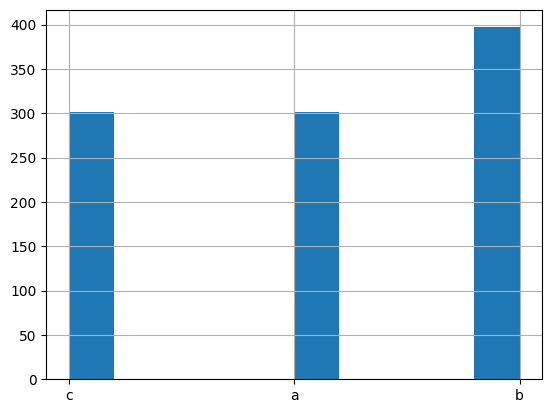

In [154]:
# generate histogram of target column
df[target].hist()

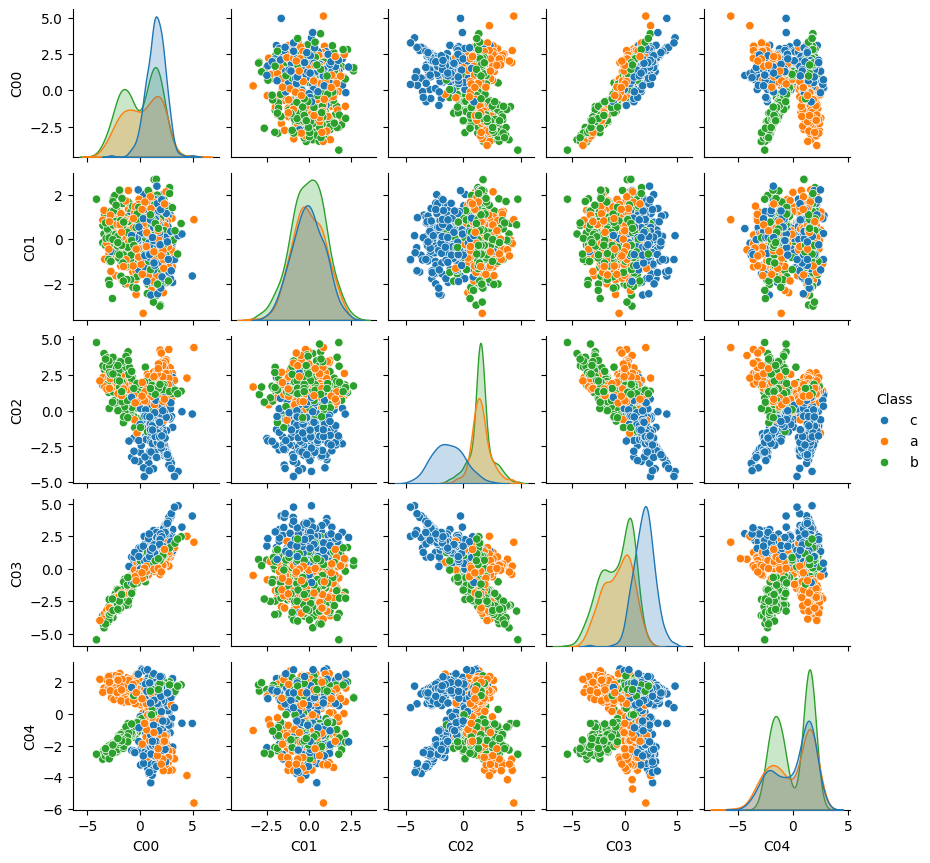

In [155]:
# pairplot using target as color
sns.pairplot(df, hue=target, height=1.75)

Verify if there are `nan` values in the dataset, and, in case, drop rows with `nan`

In [156]:
print(f"There are {df.isna().sum().sum()} nan values")

There are 519 nan values


In [157]:
df = df.dropna()
print(f"After drop there are {df.isna().sum().sum()} nan values")

After drop there are 0 nan values


- Split predicting attributes and target into `X` and `y`
- Show the number of samples in train and test, show the number of features

In [159]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

print(f"There are {X_train.shape[0]} in the training dataset")
print(f"There are {X_test.shape[0]} in the testing dataset")
print(f"Each sample has {len(X.columns)} features")

There are 434 in the training dataset
There are 145 in the testing dataset
Each sample has 5 features


Optimising the estimator

- determine the range of the parameters for the estimator
- repeatedly fit the estimator with cross validation for each value of the parameter range and find the value of the parameter giving the best accuracy
- print the value of the best parameter


In [ ]:
fitted_max_depth = 56

for i in range(26, fitted_max_depth + 1):
    tuned_param_dt = [{
        'criterion': ['gini', 'entropy'],
        'max_depth': [*range(1, i)],
        'class_weight': [None, 'balanced']
    }]

    print(f"Max depth: {i}")

    clf = GridSearchCV(DecisionTreeClassifier(random_state=random_state), tuned_param_dt, cv=5, scoring='accuracy')

    clf.fit(X_train, y_train)

    display(clf.best_estimator_)


The best parameter value is 12


- fit the estimator using the `train` part
- use the fitted estimator to predict using the test features
- compute the accuracy on the test set and print it with the best parameter value
- print a classification report and the confusion matrix for the test set

The accuracy on test set tuned with cross_validation is 79.3% with parameter 12


In [13]:
# classification report on test set

              precision    recall  f1-score   support

           a       0.80      0.73      0.76        51
           b       0.80      0.89      0.84        54
           c       0.77      0.75      0.76        40

    accuracy                           0.79       145
   macro avg       0.79      0.79      0.79       145
weighted avg       0.79      0.79      0.79       145



In [14]:
# Confusion matrix for test set

[[37  8  6]
 [ 3 48  3]
 [ 6  4 30]]
